In [8]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt

df_twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
df_twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [9]:
ids = df_twitter_archive["tweet_id"]
ids.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [14]:
import tweepy

consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

# We create a ist of the error tweets
error_list = []

# we also create a list of tweets
df_list = []

for tweet_id in ids:
    try:
        tweets = api.get_status(tweet_id, tweet_mode='extended', wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
         # this indicates the favorites count
        favorites = tweets['favorite_count']
        # this shows the retweet count
        retweets = tweets['retweet_count'] 
        # this shows the number of followers
        user_followers = tweets['user']['followers_count'] 
        # This shows numbers of favorites for the user
        user_favourites = tweets['user']['favourites_count'] 
        # this shows the date and time the tweets was created
        date_time = tweets['created_at'] 
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
        
# Create DataFrames from list of dictionaries
tweets_in_json = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# Save the dataFrame in file
tweets_in_json.to_csv('tweets_json.txt', encoding = 'utf-8', index=False)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 _ [{'code

**Accessing Our Data**

In [15]:
# Accessing our tweet_data
error_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 872261713294495745,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 856602993587888130,
 851953902622658560,
 845459076796616705,
 844704788403113984,
 842892208864923648,
 837366284874571778,
 837012587749474308,
 829374341691346946,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 779123168116150273,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

**Accessing our Data Programmatically**

In [16]:
# Read the saved tweet_json.txt file into a dataframe and access programmatically
df_tweet = pd.read_csv('tweets_json.txt', encoding = 'utf-8')
df_tweet.head()

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36942,7873,8491822,143582,2017-08-01 16:23:56
1,892177421306343426,31785,5846,8491822,143582,2017-08-01 00:17:27
2,891815181378084864,23950,3858,8491822,143582,2017-07-31 00:18:03
3,891689557279858688,40265,8044,8491822,143582,2017-07-30 15:58:51
4,891327558926688256,38469,8702,8491822,143582,2017-07-29 16:00:24


In [17]:
# Check for null values
df_tweet.isnull().any()

tweet_id           False
favorites          False
retweets           False
user_followers     False
user_favourites    False
date_time          False
dtype: bool

In [18]:
# check for duplicates
sum(df_tweet.duplicated())

0

In [19]:
# check for tweet info
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 6 columns):
tweet_id           2333 non-null int64
favorites          2333 non-null int64
retweets           2333 non-null int64
user_followers     2333 non-null int64
user_favourites    2333 non-null int64
date_time          2333 non-null object
dtypes: int64(5), object(1)
memory usage: 109.4+ KB


In [20]:
# Accessing the image prediction programmatically
df_image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# check the first five rows
df_image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
#check for duplicates
sum(df_image_predictions.duplicated())

0

In [23]:
# Accessing the twitter_archive_enhanced programmatically
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1292,708109389455101952,NaN,NaN,2016-03-11 01:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He was caught off guard by ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708109389...,10,10,Remington,None,None,None,None
1024,746507379341139972,NaN,NaN,2016-06-25 00:56:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shiloh. She did not pass the soft mout...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746507379...,10,10,Shiloh,None,None,None,None
1672,682389078323662849,NaN,NaN,2015-12-31 02:33:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brody. He's a Downton Abbey Falsetto. Add...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682389078...,9,10,Brody,None,None,None,None
702,786036967502913536,NaN,NaN,2016-10-12 02:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Scout. He really wants ...,7.798343e+17,4.196984e+09,2016-09-25 00:06:08 +0000,https://twitter.com/dog_rates/status/779834332...,11,10,Scout,None,None,None,None
939,753039830821511168,NaN,NaN,2016-07-13 01:34:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",So this just changed my life. 13/10 please enj...,NaN,NaN,NaN,https://vine.co/v/5W2Dg3XPX7a,13,10,None,None,None,None,None


In [24]:
# check the first five rows
df_tweet.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36942,7873,8491822,143582,2017-08-01 16:23:56
1,892177421306343426,31785,5846,8491822,143582,2017-08-01 00:17:27
2,891815181378084864,23950,3858,8491822,143582,2017-07-31 00:18:03
3,891689557279858688,40265,8044,8491822,143582,2017-07-30 15:58:51
4,891327558926688256,38469,8702,8491822,143582,2017-07-29 16:00:24


In [25]:
# Descriptive statistics of twitter_archive
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
# check for duplicates
sum(df_twitter_archive.duplicated())

0

In [27]:
# Number of entries for each source
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [28]:
#For invalid ratings greater than 20
df_twitter_archive[df_twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [29]:
#Orignal Tweets 
df_twitter_archive[df_twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [30]:
# Incomplete names that are shortenend
df_twitter_archive[df_twitter_archive['name'].apply(len) < 3]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [31]:
#check for null/missing values
df_tweet.isnull().sum().any(), df_image_predictions.isnull().sum().any(), df_twitter_archive.isnull().sum().any()

(False, False, True)

In [32]:
#check for column with null values
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

**Quality Issues**

in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.

retweeted_status_timestamp, timestamp should be datetime instead of object (string).

The rating_numerator and rating_denominator columns have incorrect values.

Missing values in dataset

Name column have incomplete names e.g 'Mo', 'a', 'an'

We only want original ratings (no retweets) that have images.

We may want to change this columns type (in_reply_to_status_id, in_reply_to_user_id,     

retweeted_status_id, retweeted_status_user_id and tweet_id) to string because We don't want any   operations on them.

Drop columns not needed in our analysis

Some tweet_ids have the same jpg_url, so we will drop duplicates

**Tidiness**

We need to Join 'tweet_info' and 'image_predictions' to 'twitter_archive'

We don't need all information in image_predictions

We merge all the dataframes into one single dataframes

**Cleaning**

We will clean our dataset and have it tidy up for visualization.

**Define**

Let us create a copy of our dataframes

**Code**

In [35]:
clean_tweet = df_tweet.copy()
clean_twitter_archive = df_twitter_archive.copy()
clean_image_predictions= df_image_predictions.copy()

**Test**

In [36]:
clean_tweet.head(5)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,36942,7873,8491822,143582,2017-08-01 16:23:56
1,892177421306343426,31785,5846,8491822,143582,2017-08-01 00:17:27
2,891815181378084864,23950,3858,8491822,143582,2017-07-31 00:18:03
3,891689557279858688,40265,8044,8491822,143582,2017-07-30 15:58:51
4,891327558926688256,38469,8702,8491822,143582,2017-07-29 16:00:24


**Define**

We can merge our data using pandas 

**Code**

In [37]:
clean_twitter_archive = pd.merge(left=clean_twitter_archive,
                                 right=clean_tweet, left_on='tweet_id', right_on='tweet_id', how='inner')

**Test**

In [38]:
clean_twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,Phineas,None,None,None,None,36942,7873,8491822,143582,2017-08-01 16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Tilly,None,None,None,None,31785,5846,8491822,143582,2017-08-01 00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,Archie,None,None,None,None,23950,3858,8491822,143582,2017-07-31 00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,Darla,None,None,None,None,40265,8044,8491822,143582,2017-07-30 15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,Franklin,None,None,None,None,38469,8702,8491822,143582,2017-07-29 16:00:24


**Define**

We merge the image_prediction with clean_twitter_archive

**Code**

In [39]:

clean_twitter_archive = pd.merge(clean_image_predictions, clean_twitter_archive, on='tweet_id', how='inner')

**Test**

In [40]:
# check our new data
clean_twitter_archive.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,name,doggo,floofer,pupper,puppo,favorites,retweets,user_followers,user_favourites,date_time
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,None,None,None,None,None,2471,475,8491894,143582,2015-11-15 22:32:08
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,a,None,None,None,None,122,44,8491894,143582,2015-11-15 23:05:30
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,a,None,None,None,None,118,43,8491894,143582,2015-11-15 23:21:54
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,a,None,None,None,None,279,135,8491894,143582,2015-11-16 00:04:52
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,None,None,None,None,None,99,41,8491894,143582,2015-11-16 00:24:50


**Define**

Access the new dataframe programmatically

**Code**

In [41]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2061 entries, 0 to 2060
Data columns (total 33 columns):
tweet_id                      2061 non-null int64
jpg_url                       2061 non-null object
img_num                       2061 non-null int64
p1                            2061 non-null object
p1_conf                       2061 non-null float64
p1_dog                        2061 non-null bool
p2                            2061 non-null object
p2_conf                       2061 non-null float64
p2_dog                        2061 non-null bool
p3                            2061 non-null object
p3_conf                       2061 non-null float64
p3_dog                        2061 non-null bool
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2061 non-null object
source                        2061 non-null object
text                          2061 non-null object
retweeted_status_id           74 

**Define**

Select the columns to melt and to remain,
Melt the the columns into values,
We will drop the column 'stages'

**Code**

In [42]:
melt_var = ['doggo', 'floofer', 'pupper', 'puppo']
non_melt_var = [x for x in clean_twitter_archive.columns.tolist() if x not in melt_var]

clean_twitter_archive = pd.melt(clean_twitter_archive, id_vars = non_melt_var, value_vars = melt_var, var_name = 'stages', value_name = 'dog_stage')


clean_twitter_archive = clean_twitter_archive.drop('stages', axis=1)

**Test**

In [43]:
#check our melt column
clean_twitter_archive.dog_stage.value_counts()
len(clean_twitter_archive)

8244

**Define**

Delete the retweets
Delete tweets with no pictures
Drop columns not needed
Delete dog_stage duplicates
Drop columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'

**Code**

In [44]:
clean_twitter_archive = clean_twitter_archive[pd.isnull(clean_twitter_archive.retweeted_status_id)]

#Delete tweets with no pictures
clean_twitter_archive = clean_twitter_archive.dropna(subset = ['jpg_url'])

#Drop columns not needed
clean_twitter_archive = clean_twitter_archive.drop('retweeted_status_user_id', axis=1)
clean_twitter_archive = clean_twitter_archive.drop('retweeted_status_timestamp', axis=1)
clean_twitter_archive = clean_twitter_archive.drop('date_time', axis=1)
clean_twitter_archive = clean_twitter_archive.drop('retweeted_status_id', axis=1)

#Delete dog_stage duplicates
clean_twitter_archive = clean_twitter_archive.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

#Drop columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'
clean_twitter_archive = clean_twitter_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'user_favourites'], 1)

**Test**

In [45]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 1976 to 8231
Data columns (total 23 columns):
tweet_id              1987 non-null int64
jpg_url               1987 non-null object
img_num               1987 non-null int64
p1                    1987 non-null object
p1_conf               1987 non-null float64
p1_dog                1987 non-null bool
p2                    1987 non-null object
p2_conf               1987 non-null float64
p2_dog                1987 non-null bool
p3                    1987 non-null object
p3_conf               1987 non-null float64
p3_dog                1987 non-null bool
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null int64
rating_denominator    1987 non-null int64
name                  1987 non-null object
favorites             1987 non-null int64
retweets              1987 non-null in

In [46]:
# Check for duplicates if available
clean_twitter_archive.duplicated().sum()

0

**Define**

Let create a mask and have a new column for our predictions and confidence interval

**Code**

In [47]:
# Let create a mask and have a new column for our predictions and confidence interval
prediction_algo = []
conf_level = []

# we will define a function get_prediction_confidence
def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction_algo.append(dataframe['p1'])
        conf_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction_algo.append(dataframe['p2'])
        conf_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction_algo.append(dataframe['p3'])
        conf_level.append(dataframe['p3_conf'])
    else:
        prediction_algo.append('NaN')
        conf_level.append(0)

clean_twitter_archive.apply(get_prediction_confidence, axis=1)
clean_twitter_archive['prediction_algo'] = prediction_algo
clean_twitter_archive['conf_level'] = conf_level

**Test**

In [48]:
clean_twitter_archive.conf_level.head(5)

1976    0.999120
1975    0.513191
1974    0.931861
1973    0.066736
1972    0.969171
Name: conf_level, dtype: float64

**Define**

Clean up the data by deleting more unwanted columns

**Code**

In [49]:
# Clean up the data by deleting more unwanted columns
clean_twitter_archive = clean_twitter_archive.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

**test**

In [50]:
#check the tidiness of your data
clean_twitter_archive.sample(5)

,tweet_id,jpg_url,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level
3800,822859134160621569,https://pbs.twimg.com/media/C2tiAzGXgAIFdqi.jpg,2017-01-21 17:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hobbes. He was told he was going to th...,https://twitter.com/dog_rates/status/822859134...,12,10,Hobbes,13684,2380,8491824,None,malinois,0.332897
2502,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2015-12-09 06:01:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He thinks he's flying. 13/10 th...,https://twitter.com/dog_rates/status/674468880...,13,10,Louis,6181,2017,8491892,None,chow,0.526230
3121,715200624753819648,https://pbs.twimg.com/media/CeznK6IWEAEFUPq.jpg,2016-03-30 15:34:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Michelangelope. He's half coffee cup. ...,https://twitter.com/dog_rates/status/715200624...,12,10,Michelangelope,5212,1912,8491867,None,Chihuahua,0.956787
2924,697270446429966336,https://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg,2016-02-10 04:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bentley. He got stuck on his 3rd homew...,https://twitter.com/dog_rates/status/697270446...,10,10,Bentley,4772,1913,8491866,None,toy_poodle,0.880014
2753,684225744407494656,https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,143,130,None,1252,212,8491867,None,golden_retriever,0.203249


**Define**

Check Columns with forwardslash in text

**Code**

In [51]:
# check Columns with forwardslash in text
df_slash = clean_twitter_archive[clean_twitter_archive.text.str.contains(r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text
df_slash.head(2)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


20    This is an Albanian 3 1/2 legged  Episcopalian...
49    These are Peruvian Feldspars. Their names are ...
Name: text, dtype: object

**Test**

In [52]:
# check the column for more information
clean_twitter_archive[clean_twitter_archive.text.isin(df_slash)]

,tweet_id,jpg_url,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,139,63,8491894,None,Maltese_dog,0.857531
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,https://twitter.com/dog_rates/status/666835007...,10,10,None,203,77,8491893,None,Airedale,0.448459
3307,747600769478692864,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,10,10,Bookstore,2370,561,8491865,None,Chesapeake_Bay_retriever,0.804363
3256,740373189193256964,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,35604,13546,8491865,None,golden_retriever,0.807644
2993,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,9,10,Socks,1947,392,8491867,None,Border_collie,0.894842
3165,722974582966214656,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,4161,1581,8491866,None,Great_Dane,0.246762
3131,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,2405,214,8491867,None,Siberian_husky,0.396495
3115,714258258790387713,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,2016-03-28 01:10:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Travis and Flurp. Travis is pretty chill ...,https://twitter.com/dog_rates/status/714258258...,10,10,Travis,3071,728,8491867,None,collie,0.176758
3516,777684233540206592,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,2016-09-19 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Yep... just as I suspected. You're not flossi...",https://twitter.com/dog_rates/status/777684233...,12,10,None,11622,3046,8491829,None,cocker_spaniel,0.253442
2506,674646392044941312,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,5,10,None,1424,490,8491892,None,flat-coated_retriever,0.837448


In [53]:
# View tweets with decimals in rating in 'text' column
clean_twitter_archive[clean_twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,jpg_url,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level
2020,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,43864,9225,8491822,None,golden_retriever,0.943082
3573,786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,18957,6384,8491830,None,Pomeranian,0.467321
2681,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,1753,489,8491868,None,kuvasz,0.438627
5579,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,6783,1678,8491829,pupper,clumber,0.946718


**Define**

Set correct numerators for specific tweets

**Code**

In [54]:
# Set correct numerators for specific tweets
clean_twitter_archive.loc[(clean_twitter_archive['tweet_id'] == 883482846933004288) & (clean_twitter_archive['rating_numerator'] == 5), ['rating_numerator']] = 13.5
clean_twitter_archive.loc[(clean_twitter_archive['tweet_id'] == 786709082849828864) & (clean_twitter_archive['rating_numerator'] == 75), ['rating_numerator']] = 9.75
clean_twitter_archive.loc[(clean_twitter_archive['tweet_id'] == 778027034220126208) & (clean_twitter_archive['rating_numerator'] == 27), ['rating_numerator']] = 11.27
clean_twitter_archive.loc[(clean_twitter_archive['tweet_id'] == 680494726643068929) & (clean_twitter_archive['rating_numerator'] == 26), ['rating_numerator']] = 11.26

**Test**

In [55]:
# Confirm decimals solved
clean_twitter_archive[clean_twitter_archive.text.str.contains(r"(\d+\.\d*\/\d+)")]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,jpg_url,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level
2020,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,43864,9225,8491822,None,golden_retriever,0.943082
3573,786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,18957,6384,8491830,None,Pomeranian,0.467321
2681,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,1753,489,8491868,None,kuvasz,0.438627
5579,778027034220126208,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,6783,1678,8491829,pupper,clumber,0.946718


**Define**

Lets get dog_gender from text column

**Code**

In [56]:
# Lets get dog_gender from text column

male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in clean_twitter_archive['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

# Save the result in a new column 'dog_name'
clean_twitter_archive['dog_gender'] = dog_gender

**Test**

In [57]:
# check your data to see if you need to dig more
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 1976 to 8231
Data columns (total 16 columns):
tweet_id              1987 non-null int64
jpg_url               1987 non-null object
timestamp             1987 non-null object
source                1987 non-null object
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null float64
rating_denominator    1987 non-null int64
name                  1987 non-null object
favorites             1987 non-null int64
retweets              1987 non-null int64
user_followers        1987 non-null int64
dog_stage             1987 non-null object
prediction_algo       1987 non-null object
conf_level            1987 non-null float64
dog_gender            1987 non-null object
dtypes: float64(2), int64(5), object(9)
memory usage: 263.9+ KB


**Define**

We will change data types

**Code**

In [58]:
# change data types
clean_twitter_archive['tweet_id'] = clean_twitter_archive['tweet_id'].astype(str)
clean_twitter_archive['timestamp'] = pd.to_datetime(clean_twitter_archive.timestamp)
clean_twitter_archive['source'] = clean_twitter_archive['source'].astype('category')
clean_twitter_archive['favorites'] = clean_twitter_archive['favorites'].astype(int)
clean_twitter_archive['retweets'] = clean_twitter_archive['retweets'].astype(int)
clean_twitter_archive['user_followers'] = clean_twitter_archive['user_followers'].astype(int)
clean_twitter_archive['dog_stage'] = clean_twitter_archive['dog_stage'].astype('category')
clean_twitter_archive['rating_numerator'] = clean_twitter_archive['rating_numerator'].astype(float)
clean_twitter_archive['rating_denominator'] = clean_twitter_archive['rating_denominator'].astype(float)
clean_twitter_archive['dog_gender'] = clean_twitter_archive['dog_gender'].astype('category')

**Test**

In [59]:
# check your data to see if you need to dig more
clean_twitter_archive.info(), clean_twitter_archive.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 1976 to 8231
Data columns (total 16 columns):
tweet_id              1987 non-null object
jpg_url               1987 non-null object
timestamp             1987 non-null datetime64[ns]
source                1987 non-null category
text                  1987 non-null object
expanded_urls         1987 non-null object
rating_numerator      1987 non-null float64
rating_denominator    1987 non-null float64
name                  1987 non-null object
favorites             1987 non-null int64
retweets              1987 non-null int64
user_followers        1987 non-null int64
dog_stage             1987 non-null category
prediction_algo       1987 non-null object
conf_level            1987 non-null float64
dog_gender            1987 non-null category
dtypes: category(3), datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 223.5+ KB


(None, (1987, 16))

**Define**

check the descriptive statistics

**Code**

In [60]:
# check the descriptive statistics
clean_twitter_archive.describe()

,rating_numerator,rating_denominator,favorites,retweets,user_followers,conf_level
count,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000
mean,12.236930,10.533971,8439.546553,2512.754404,8.491865e+06,0.463913
std,41.544174,7.333532,12416.256185,4497.534713,6.545997e+01,0.339364
min,0.000000,2.000000,73.000000,11.000000,8.491822e+06,0.000000
25%,10.000000,10.000000,1812.500000,562.000000,8.491829e+06,0.140041
50%,11.000000,10.000000,3803.000000,1213.000000,8.491866e+06,0.457356
75%,12.000000,10.000000,10513.000000,2855.000000,8.491892e+06,0.776138
max,1776.000000,170.000000,159681.000000,79688.000000,8.492554e+06,0.999956


In [61]:
# check the first five rows
clean_twitter_archive.head(5)

,tweet_id,jpg_url,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level,dog_gender
1976,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,2017-06-08 14:20:41,"<a href=""http://twitter.com/download/iphone"" r...",Here are my favorite #dogsatpollingstations \n...,https://twitter.com/dog_rates/status/872820683...,13.0,10.0,None,14142,3489,8491822,None,pug,0.999120,NaN
1975,872620804844003328,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,2017-06-08 01:06:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13.0,10.0,Monkey,19934,3443,8491822,None,cocker_spaniel,0.513191,female
1974,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,2017-06-07 16:14:40,"<a href=""http://twitter.com/download/iphone"" r...",We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12.0,10.0,None,39130,8496,8491823,None,Pembroke,0.931861,NaN
1973,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,2017-06-06 16:07:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Kody. He's a baller. Wishes he was a l...,https://twitter.com/dog_rates/status/872122724...,12.0,10.0,Kody,33058,7645,8491823,None,pug,0.066736,male
1972,871879754684805121,https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg,2017-06-06 00:01:46,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lassie. She's celebrating #PrideM...,https://twitter.com/dog_rates/status/871879754...,13.0,10.0,Lassie,36308,10418,8491823,None,Shetland_sheepdog,0.969171,female


**Define**

Drop the source coulmn

**Code**

In [62]:
# drop the source coulmn
clean_twitter_archive = clean_twitter_archive.drop(['source'], 1)

**Test**

In [63]:
# check the first five rows again
clean_twitter_archive.head(5)

,tweet_id,jpg_url,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level,dog_gender
1976,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,2017-06-08 14:20:41,Here are my favorite #dogsatpollingstations \n...,https://twitter.com/dog_rates/status/872820683...,13.0,10.0,None,14142,3489,8491822,None,pug,0.999120,NaN
1975,872620804844003328,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13.0,10.0,Monkey,19934,3443,8491822,None,cocker_spaniel,0.513191,female
1974,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12.0,10.0,None,39130,8496,8491823,None,Pembroke,0.931861,NaN
1973,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,2017-06-06 16:07:15,This is Kody. He's a baller. Wishes he was a l...,https://twitter.com/dog_rates/status/872122724...,12.0,10.0,Kody,33058,7645,8491823,None,pug,0.066736,male
1972,871879754684805121,https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg,2017-06-06 00:01:46,Say hello to Lassie. She's celebrating #PrideM...,https://twitter.com/dog_rates/status/871879754...,13.0,10.0,Lassie,36308,10418,8491823,None,Shetland_sheepdog,0.969171,female


In [64]:
# check your cleaned Dataframe
list(clean_twitter_archive)

['tweet_id',
 'jpg_url',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'favorites',
 'retweets',
 'user_followers',
 'dog_stage',
 'prediction_algo',
 'conf_level',
 'dog_gender']

In [65]:
# clean and dig more
clean_twitter_archive.drop(clean_twitter_archive.columns[clean_twitter_archive.columns.str.contains('Unnamed',case = False)],axis = 1)

,tweet_id,jpg_url,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level,dog_gender
1976,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,2017-06-08 14:20:41,Here are my favorite #dogsatpollingstations \n...,https://twitter.com/dog_rates/status/872820683...,13.0,10.0,None,14142,3489,8491822,None,pug,0.999120,NaN
1975,872620804844003328,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13.0,10.0,Monkey,19934,3443,8491822,None,cocker_spaniel,0.513191,female
1974,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12.0,10.0,None,39130,8496,8491823,None,Pembroke,0.931861,NaN
1973,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,2017-06-06 16:07:15,This is Kody. He's a baller. Wishes he was a l...,https://twitter.com/dog_rates/status/872122724...,12.0,10.0,Kody,33058,7645,8491823,None,pug,0.066736,male
1972,871879754684805121,https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg,2017-06-06 00:01:46,Say hello to Lassie. She's celebrating #PrideM...,https://twitter.com/dog_rates/status/871879754...,13.0,10.0,Lassie,36308,10418,8491823,None,Shetland_sheepdog,0.969171,female
1969,871032628920680449,https://pbs.twimg.com/media/DBaHi3YXgAE6knM.jpg,2017-06-03 15:55:36,This is Boomer. He's doing an advanced water t...,https://twitter.com/dog_rates/status/871032628...,13.0,10.0,Boomer,21868,3610,8491823,None,kelpie,0.398053,NaN
1968,870804317367881728,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,2017-06-03 00:48:22,Real funny guys. Sending in a pic without a do...,https://twitter.com/dog_rates/status/870804317...,11.0,10.0,None,32425,5867,8491823,None,NaN,0.000000,NaN
1967,870656317836468226,https://pbs.twimg.com/media/DBUxSSTXsAA-Jn1.jpg,2017-06-02 15:00:16,This is Cody. He zoomed too aggressively and t...,https://www.gofundme.com/help-fix-codys-torn-a...,13.0,10.0,Cody,11943,2493,8491823,None,Pembroke,0.945495,male
1966,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,2017-06-01 20:18:38,This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10.0,Zoey,79902,25051,8491823,None,golden_retriever,0.841001,female
1965,870308999962521604,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,2017-06-01 16:00:09,"This is Rumble, but he's not ready to. Would r...",https://twitter.com/dog_rates/status/870308999...,13.0,10.0,Rumble,21100,3935,8491823,None,Greater_Swiss_Mountain_dog,0.622752,male


**Store Dataset**

In [66]:
# Save dataFrame to csv file
clean_twitter_archive.to_csv('/home/twitter_archive_master.csv', encoding = 'utf-8', index=False)

**Import dataset for analysis**

In [67]:
# Prepare our dataset for analysis
df_master = pd.read_csv('/home/twitter_archive_master.csv')
df_master.head(5)                        

,tweet_id,jpg_url,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level,dog_gender
0,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,2017-06-08 14:20:41,Here are my favorite #dogsatpollingstations \n...,https://twitter.com/dog_rates/status/872820683...,13.0,10.0,None,14142,3489,8491822,None,pug,0.999120,NaN
1,872620804844003328,https://pbs.twimg.com/media/DBwr_hzXkAEnZBW.jpg,2017-06-08 01:06:27,This is Monkey. She's supporting owners everyw...,https://twitter.com/dog_rates/status/872620804...,13.0,10.0,Monkey,19934,3443,8491822,None,cocker_spaniel,0.513191,female
2,872486979161796608,https://pbs.twimg.com/media/DBuyRlTUwAAYhG9.jpg,2017-06-07 16:14:40,We. Only. Rate. Dogs. Do not send in other thi...,https://twitter.com/dog_rates/status/872486979...,12.0,10.0,None,39130,8496,8491823,None,Pembroke,0.931861,NaN
3,872122724285648897,https://pbs.twimg.com/media/DBpm-5UXcAUeCru.jpg,2017-06-06 16:07:15,This is Kody. He's a baller. Wishes he was a l...,https://twitter.com/dog_rates/status/872122724...,12.0,10.0,Kody,33058,7645,8491823,None,pug,0.066736,male
4,871879754684805121,https://pbs.twimg.com/media/DBmKAmBXUAE-pQ-.jpg,2017-06-06 00:01:46,Say hello to Lassie. She's celebrating #PrideM...,https://twitter.com/dog_rates/status/871879754...,13.0,10.0,Lassie,36308,10418,8491823,None,Shetland_sheepdog,0.969171,female


In [68]:
df_master.describe()

,tweet_id,rating_numerator,rating_denominator,favorites,retweets,user_followers,conf_level
count,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000
mean,7.356264e+17,12.236930,10.533971,8439.546553,2512.754404,8.491865e+06,0.463913
std,6.739210e+16,41.544174,7.333532,12416.256185,4497.534713,6.545997e+01,0.339364
min,6.660209e+17,0.000000,2.000000,73.000000,11.000000,8.491822e+06,0.000000
25%,6.758218e+17,10.000000,10.000000,1812.500000,562.000000,8.491829e+06,0.140041
50%,7.083495e+17,11.000000,10.000000,3803.000000,1213.000000,8.491866e+06,0.457356
75%,7.873602e+17,12.000000,10.000000,10513.000000,2855.000000,8.491892e+06,0.776138
max,8.924206e+17,1776.000000,170.000000,159681.000000,79688.000000,8.492554e+06,0.999956


**Insights and Vitualization**

In [69]:
# The most favorites
df_master.favorites.max(), df_master.favorites.min()

(159681, 73)

In [73]:
# The most favorite is Labrador_retriever in the Dog stage.
df_master[df_master['favorites'] ==159681]

,tweet_id,jpg_url,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level,dog_gender
1691,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,159681,79688,8491865,doggo,Labrador_retriever,0.825333,NaN


In [74]:
# Less favorite is English_setter in the Dog stage.
df_master[df_master['favorites'] ==73]

,tweet_id,jpg_url,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level,dog_gender
130,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,2015-11-16 03:55:04,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11.0,10.0,None,73,11,8491894,None,English_setter,0.298617,NaN


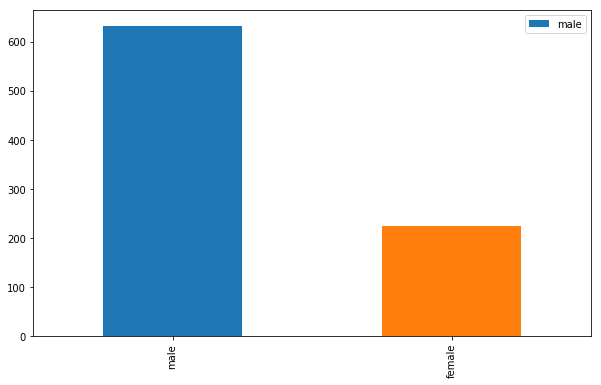

In [75]:
# Most favorite Dog gender
from matplotlib.pyplot import *

fig, ax = subplots()
df_master['dog_gender'].value_counts().plot(kind = 'bar', figsize = (10, 6), ax=ax)
ax.legend(['male', 'female']);

The male dogs are the most common dog gender.

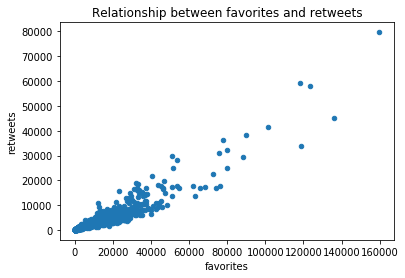

In [76]:
# Relationship between favorites and retweets
df_master.plot.scatter('favorites', 'retweets')
plt.title('Relationship between favorites and retweets');

There's a close relationship between favorites and retweets. Labrador_retriever is the most favorites and also has the most retweets while English_setter is the least favorites and also has the least retweets.

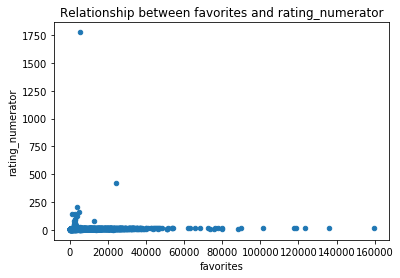

In [77]:
# Relationship between favorites and ratings
df_master.plot.scatter('favorites', 'rating_numerator')
plt.title('Relationship between favorites and rating_numerator');

In [78]:
# The most retweets
df_master.retweets.max(), df_master.retweets.min()

(79688, 11)

In [79]:
# The most retweets is Labrador_retriever in the Dog stage.
df_master[df_master['retweets'] ==79688]

,tweet_id,jpg_url,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level,dog_gender
1691,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,159681,79688,8491865,doggo,Labrador_retriever,0.825333,NaN


In [80]:
# The least retweets is English setter in the Dog stage.
df_master[df_master['retweets'] ==11]

,tweet_id,jpg_url,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,favorites,retweets,user_followers,dog_stage,prediction_algo,conf_level,dog_gender
130,666102155909144576,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,2015-11-16 03:55:04,Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11.0,10.0,None,73,11,8491894,None,English_setter,0.298617,NaN
